# California Housing Price Prediction
### By: Manoranjini P

In this project, we aim to predict housing prices in California using multiple machine learning models. The main steps include:
- Loading and exploring the dataset
- Preprocessing the data
- Training multiple models with hyperparameter tuning
- Evaluating and comparing model performance
- Predicting housing prices based on user inputs


In [ ]:
!pip install pandas numpy scikit-learn xgboost ipywidgets matplotlib seaborn > /dev/null

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import fetch_california_housing
import ipywidgets as widgets
from IPython.display import display
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
# Load the California Housing dataset
data = fetch_california_housing()
X = pd.DataFrame(data.data, columns=data.feature_names)
y = pd.Series(data.target, name="Price")

# Display the first few rows
X.head()


,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


## Dataset Information

- **MedInc**: Median income in block group
- **HouseAge**: Median house age in block group
- **AveRooms**: Average number of rooms per household
- **AveBedrms**: Average number of bedrooms per household
- **Population**: Block group population
- **AveOccup**: Average number of household members
- **Latitude**: Block group latitude
- **Longitude**: Block group longitude


In [ ]:
# Handle missing values
X.fillna(X.mean(), inplace=True)

# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

print(f"Training data shape: {X_train.shape}")
print(f"Test data shape: {X_test.shape}")


Training data shape: (16512, 8)
Test data shape: (4128, 8)


In [ ]:
# Display total, training, and testing sizes
#total_samples = len(df) # This line caused the error
total_samples = len(X) # Use X to get the total number of samples
train_samples = len(X_train)
test_samples = len(X_test)

print("📊 Dataset Split Evaluation")
print(f"Total Samples: {total_samples}")
print(f"Training Samples (80%): {train_samples} ({(train_samples / total_samples) * 100:.2f}%)")
print(f"Testing Samples (20%): {test_samples} ({(test_samples / total_samples) * 100:.2f}%)")

print("📊 Prediction Accuracy (as Percentage R² Score):\n")

for name, model in best_models.items():
    y_pred = model.predict(X_test)
    r2 = r2_score(y_test, y_pred) * 100
    print(f"{name}: {r2:.2f}%")



📊 Dataset Split Evaluation
Total Samples: 20640
Training Samples (80%): 16512 (80.00%)
Testing Samples (20%): 4128 (20.00%)
📊 Prediction Accuracy (as Percentage R² Score):

Linear Regression: 57.58%
Decision Tree: 68.52%
Random Forest: 80.82%
XGBoost: 83.58%


In [ ]:
# Initialize models
models = {
    "Linear Regression": LinearRegression(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest": RandomForestRegressor(),
    "XGBoost": XGBRegressor(objective='reg:squarederror', verbosity=0)
}

# Hyperparameter grid
param_grid = {
    "Decision Tree": {'max_depth': [3, 5, 10], 'min_samples_split': [2, 5, 10]},
    "Random Forest": {'n_estimators': [50, 100, 200], 'max_depth': [3, 10, 20]},
    "XGBoost": {'n_estimators': [100, 200], 'learning_rate': [0.01, 0.1, 0.3], 'max_depth': [3, 6, 10]}
}


In [ ]:
best_models = {}
for name, model in models.items():
    print(f"\nTraining {name}...")
    if name in param_grid:
        grid_search = GridSearchCV(model, param_grid[name], cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
        grid_search.fit(X_train, y_train)
        best_models[name] = grid_search.best_estimator_
    else:
        model.fit(X_train, y_train)
        best_models[name] = model



Training Linear Regression...

Training Decision Tree...

Training Random Forest...

Training XGBoost...


In [ ]:
for name, model in best_models.items():
    preds = model.predict(X_test)
    mse = mean_squared_error(y_test, preds)
    r2 = r2_score(y_test, preds)
    mae = mean_absolute_error(y_test, preds)
    print(f"{name} MSE: {mse:.4f}, R²: {r2:.4f}, MAE: {mae:.4f}")


Linear Regression MSE: 0.5559, R²: 0.5758, MAE: 0.5332
Decision Tree MSE: 0.4125, R²: 0.6852, MAE: 0.4329
Random Forest MSE: 0.2514, R²: 0.8082, MAE: 0.3257
XGBoost MSE: 0.2152, R²: 0.8358, MAE: 0.3026


Linear Regression MSE: 0.5559, R²: 0.5758, MAE: 0.5332
Decision Tree MSE: 0.4125, R²: 0.6852, MAE: 0.4329
Random Forest MSE: 0.2514, R²: 0.8082, MAE: 0.3257
XGBoost MSE: 0.2152, R²: 0.8358, MAE: 0.3026


<ipython-input-32-9f1d241a99fc>:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=model_names, y=mse_values, ax=axes[0], palette="Blues_d")
<ipython-input-32-9f1d241a99fc>:31: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=model_names, y=r2_values, ax=axes[1], palette="Greens_d")
<ipython-input-32-9f1d241a99fc>:37: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=model_names, y=mae_values, ax=axes[2], palette="Reds_d")


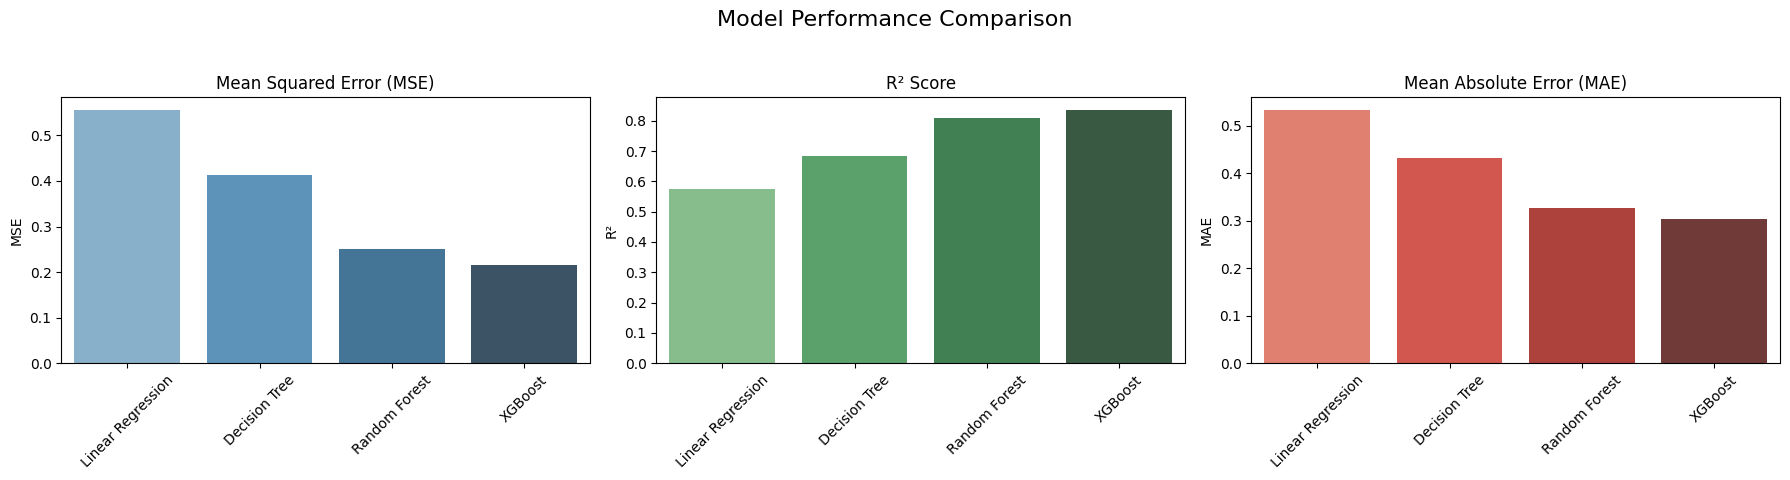

In [ ]:
# Assuming the previous cell finished executing and best_models is populated

model_names = []
mse_values = []
r2_values = []
mae_values = []

for name, model in best_models.items():
    preds = model.predict(X_test)
    mse = mean_squared_error(y_test, preds)
    r2 = r2_score(y_test, preds)
    mae = mean_absolute_error(y_test, preds)
    print(f"{name} MSE: {mse:.4f}, R²: {r2:.4f}, MAE: {mae:.4f}")

    # Store the values for plotting
    model_names.append(name)
    mse_values.append(mse)
    r2_values.append(r2)
    mae_values.append(mae)

# Improved visualization for model comparison
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# MSE plot
sns.barplot(x=model_names, y=mse_values, ax=axes[0], palette="Blues_d")
axes[0].set_title('Mean Squared Error (MSE)')
axes[0].set_ylabel('MSE')
axes[0].tick_params(axis='x', rotation=45) # Rotate labels for better readability

# R2 plot
sns.barplot(x=model_names, y=r2_values, ax=axes[1], palette="Greens_d")
axes[1].set_title('R² Score')
axes[1].set_ylabel('R²')
axes[1].tick_params(axis='x', rotation=45) # Rotate labels for better readability

# MAE plot
sns.barplot(x=model_names, y=mae_values, ax=axes[2], palette="Reds_d")
axes[2].set_title('Mean Absolute Error (MAE)')
axes[2].set_ylabel('MAE')
axes[2].tick_params(axis='x', rotation=45) # Rotate labels for better readability

plt.suptitle('Model Performance Comparison', fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.95]) # Adjust layout to prevent title overlap
plt.show()

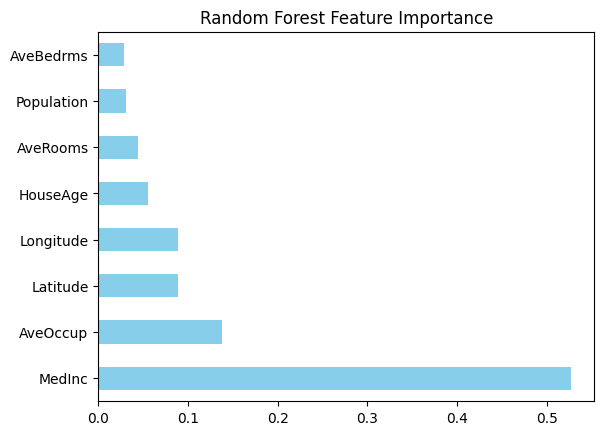

In [ ]:
# Feature Importance for Random Forest
rf_model = best_models["Random Forest"]
importances = rf_model.feature_importances_
feat_importances = pd.Series(importances, index=data.feature_names)
feat_importances.nlargest(8).plot(kind='barh', color='skyblue')
plt.title('Random Forest Feature Importance')
plt.show()


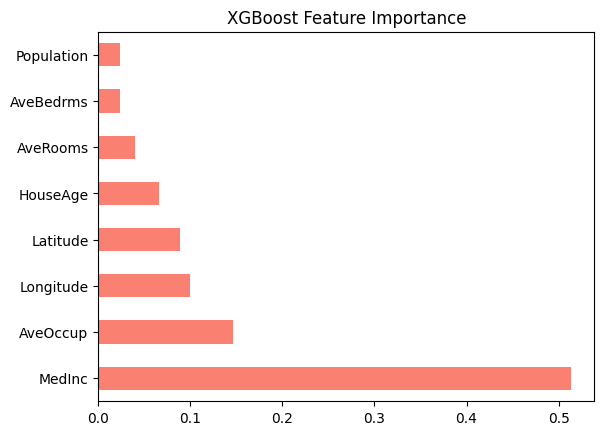

In [ ]:
# Feature Importance for XGBoost
xgb_model = best_models["XGBoost"]
importances = xgb_model.feature_importances_
feat_importances = pd.Series(importances, index=data.feature_names)
feat_importances.nlargest(8).plot(kind='barh', color='salmon')
plt.title('XGBoost Feature Importance')
plt.show()


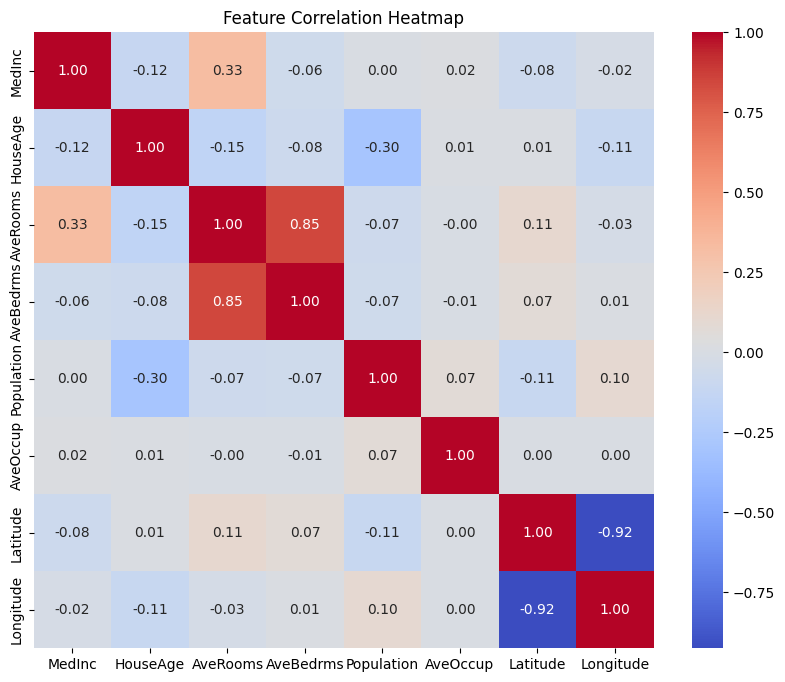

In [ ]:
# Correlation Heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(X.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Feature Correlation Heatmap")
plt.show()


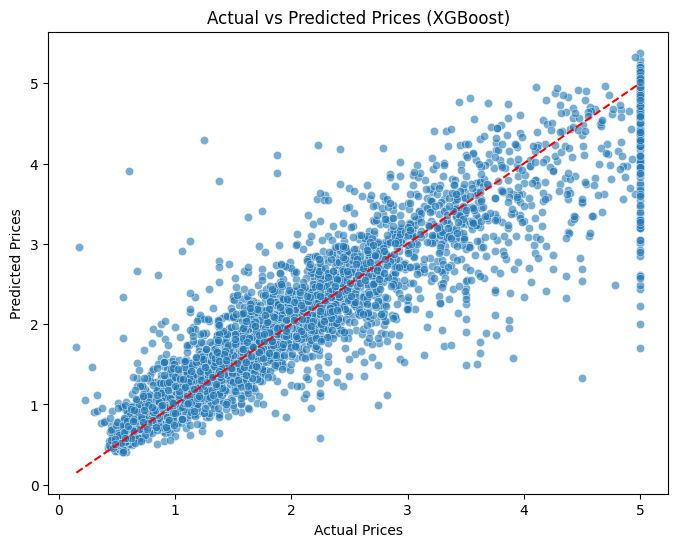

In [ ]:
# Prediction vs Actual for the best model (e.g., XGBoost)
best_model = best_models["XGBoost"]
preds = best_model.predict(X_test)

plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=preds, alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')  # Diagonal line
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual vs Predicted Prices (XGBoost)')
plt.show()


In [ ]:
from IPython.display import display
import ipywidgets as widgets

def get_user_input_widget():
    print("Enter the values for the following features:")

    user_data = {}
    for col in X.columns:
        input_box = widgets.FloatText(
            value=0.0,
            description=col,
            step=0.1,
            style={'description_width': 'initial'},
            layout=widgets.Layout(width='50%')
        )
        display(input_box)
        user_data[col] = input_box

    return user_data

user_data = get_user_input_widget()

def predict_price(button):
    user_input = pd.DataFrame({col: field.value for col, field in user_data.items()}, index=[0])

    if 'scaler' in globals():
        user_input_scaled = scaler.transform(user_input)
    else:
        user_input_scaled = user_input

    print("\nPredictions based on your input:")
    for name, model in best_models.items():
        prediction = model.predict(user_input_scaled)[0]
        print(f"{name}: ${prediction:.2f} (in dollars)")

button = widgets.Button(description="Predict Price")
button.on_click(predict_price)
display(button)


Enter the values for the following features:


FloatText(value=0.0, description='MedInc', layout=Layout(width='50%'), step=0.1, style=DescriptionStyle(descri…

FloatText(value=0.0, description='HouseAge', layout=Layout(width='50%'), step=0.1, style=DescriptionStyle(desc…

FloatText(value=0.0, description='AveRooms', layout=Layout(width='50%'), step=0.1, style=DescriptionStyle(desc…

FloatText(value=0.0, description='AveBedrms', layout=Layout(width='50%'), step=0.1, style=DescriptionStyle(des…

FloatText(value=0.0, description='Population', layout=Layout(width='50%'), step=0.1, style=DescriptionStyle(de…

FloatText(value=0.0, description='AveOccup', layout=Layout(width='50%'), step=0.1, style=DescriptionStyle(desc…

FloatText(value=0.0, description='Latitude', layout=Layout(width='50%'), step=0.1, style=DescriptionStyle(desc…

FloatText(value=0.0, description='Longitude', layout=Layout(width='50%'), step=0.1, style=DescriptionStyle(des…

Button(description='Predict Price', style=ButtonStyle())


Predictions based on your input:
Linear Regression: $2.36 (in dollars)
Decision Tree: $2.02 (in dollars)
Random Forest: $2.80 (in dollars)
XGBoost: $2.70 (in dollars)


# ✅ Project Conclusion

- **XGBoost** and **Random Forest** performed best on the dataset.
- The interactive app allows users to predict house prices based on features.
- Model comparison shows how different algorithms perform on the same data.

---